# Word Embeddings: numerical representations to classify clinical text

### Jocelyn Dunstan y Fabián Villena, CIMT, Uchile

Modules loading

In [3]:
import numpy as np #linear algebra
import nltk #natural language processing tools
import gensim #neural word embedding training
import re #regular expressions
import logging #verbosity (code telling you what's going on)
import csv #data loading
import sklearn.ensemble #classifier
import sklearn.metrics #performance assessment
import sklearn.model_selection #train-test split

Downloading extra data for nltk

In [4]:
nltk.download('stopwords') # connectors and other non-semantic rich expressions
nltk.download('punkt') # sentence tokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jocelyn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/jocelyn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Adding some verbosity to the embedding training session, i.e., the coding telling you what is doing

In [5]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

Loading spanish stopwords list from nltk

In [6]:
stopwords = nltk.corpus.stopwords.words('spanish')

In [7]:
set(stopwords)

{'a',
 'al',
 'algo',
 'algunas',
 'algunos',
 'ante',
 'antes',
 'como',
 'con',
 'contra',
 'cual',
 'cuando',
 'de',
 'del',
 'desde',
 'donde',
 'durante',
 'e',
 'el',
 'ella',
 'ellas',
 'ellos',
 'en',
 'entre',
 'era',
 'erais',
 'eran',
 'eras',
 'eres',
 'es',
 'esa',
 'esas',
 'ese',
 'eso',
 'esos',
 'esta',
 'estaba',
 'estabais',
 'estaban',
 'estabas',
 'estad',
 'estada',
 'estadas',
 'estado',
 'estados',
 'estamos',
 'estando',
 'estar',
 'estaremos',
 'estará',
 'estarán',
 'estarás',
 'estaré',
 'estaréis',
 'estaría',
 'estaríais',
 'estaríamos',
 'estarían',
 'estarías',
 'estas',
 'este',
 'estemos',
 'esto',
 'estos',
 'estoy',
 'estuve',
 'estuviera',
 'estuvierais',
 'estuvieran',
 'estuvieras',
 'estuvieron',
 'estuviese',
 'estuvieseis',
 'estuviesen',
 'estuvieses',
 'estuvimos',
 'estuviste',
 'estuvisteis',
 'estuviéramos',
 'estuviésemos',
 'estuvo',
 'está',
 'estábamos',
 'estáis',
 'están',
 'estás',
 'esté',
 'estéis',
 'estén',
 'estés',
 'fue',
 'f

Some self-defined functions

In [8]:
def normalizer(text): #normalizes a given string to lowercase and changes all vowels to their base form
    text = text.lower() #string lowering
    text = re.sub(r'[^A-Za-zñáéíóú]', ' ', text) #replaces every punctuation with a space
    text = re.sub('á', 'a', text) #replaces special vowels to their base forms
    text = re.sub('é', 'e', text)
    text = re.sub('í', 'i', text)
    text = re.sub('ó', 'o', text)
    text = re.sub('ú', 'u', text)
    return text

In [9]:
def vectorizer(text, model): #returns a vector representation from a list of words and a given model
    vectors = []
    for i in text:
        try:
            vectors.append(model.wv[i])
        except:
            pass
    return(np.mean(vectors,axis=0))

## Word Embedding

Loading the corpus dataset and taking each line to an array of sentences. We are using the whole Aysen's waiting list as a corpus

In [10]:
sentences = []
with open('corpus.txt', encoding='utf-8') as file: #use utf-8 to preserve special characters
    for line in file:
        sentences.append((line.rstrip())) #use strip to remove \n (newline)

Taking every sentence and normalizing it

In [11]:
normalized_sentences = [normalizer(sentence) for sentence in sentences]

Tokenizing every sentence into words

In [12]:
tokenized_sentences = [nltk.word_tokenize(sentence) for sentence in normalized_sentences]

Removing stopwords

In [13]:
without_stopwords_sentences = []
for sentence in tokenized_sentences:
    without_stopwords_sentence = [word for word in sentence if word not in stopwords]
    without_stopwords_sentences.append(without_stopwords_sentence)

Training the neural word embeddings word2vec

In [14]:
model = gensim.models.Word2Vec(without_stopwords_sentences)

2019-06-14 17:44:07,433 : INFO : collecting all words and their counts
2019-06-14 17:44:07,437 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-14 17:44:07,455 : INFO : PROGRESS: at sentence #10000, processed 26393 words, keeping 2174 word types
2019-06-14 17:44:07,472 : INFO : PROGRESS: at sentence #20000, processed 53049 words, keeping 2795 word types
2019-06-14 17:44:07,484 : INFO : PROGRESS: at sentence #30000, processed 80100 words, keeping 3189 word types
2019-06-14 17:44:07,494 : INFO : PROGRESS: at sentence #40000, processed 107473 words, keeping 3528 word types
2019-06-14 17:44:07,506 : INFO : PROGRESS: at sentence #50000, processed 134970 words, keeping 3783 word types
2019-06-14 17:44:07,516 : INFO : PROGRESS: at sentence #60000, processed 162957 words, keeping 3986 word types
2019-06-14 17:44:07,529 : INFO : PROGRESS: at sentence #70000, processed 191225 words, keeping 4140 word types
2019-06-14 17:44:07,539 : INFO : PROGRESS: at sentence #

Retrieving the most similar words to a given word

In [15]:
model.wv.most_similar('diente')

2019-06-14 17:44:11,029 : INFO : precomputing L2-norms of word weight vectors


[('arcos', 0.9700565338134766),
 ('posicion', 0.9650216102600098),
 ('maxilobasilar', 0.9583778381347656),
 ('dentarios', 0.9527478218078613),
 ('evidentes', 0.9444413185119629),
 ('dentofaciales', 0.9403241276741028),
 ('relacion', 0.9392038583755493),
 ('anomalias', 0.9391248226165771),
 ('incluso', 0.9228612780570984),
 ('tamaño', 0.9005733132362366)]

Test your own words!

## Classifier: Can we classify the medical specialty from the diagnosis?

Loading the raw dataset and extracting the features and labels

In [16]:
diagnostics = [] #classifier raw features
specialties = [] #classifier raw labels
with open('data.csv', encoding='utf-8') as file:
    data = csv.DictReader(file)
    for row in data:
        diagnostics.append(row['diagnostic'])
        specialties.append(row['specialty'])

Preprocessing

In [17]:
diagnostics_normalized = [normalizer(diagnostic) for diagnostic in diagnostics]

In [18]:
diagnostics_tokenized = [nltk.word_tokenize(diagnostic) for diagnostic in diagnostics_normalized]

In [19]:
diagnostics_wihout_stopwords = []
for diagnostic in diagnostics_tokenized:
    diagnostic_wihout_stopwords = [word for word in diagnostic if word not in stopwords]
    diagnostics_wihout_stopwords.append(diagnostic_wihout_stopwords)

Creating an empty matrix to store the encoded features

In [20]:
diagnostics_matrix = np.zeros((len(diagnostics_wihout_stopwords), len(model.wv['cancer'])))

Filling the matrix with the vectorized diagnostics

In [21]:
for i,diagnostic in enumerate(diagnostics_wihout_stopwords):
    vector = vectorizer(diagnostic,model)
    diagnostics_matrix[i,] = vector

/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Creating an empty vector to store the encoded labels

In [22]:
specialties_vector = np.zeros((len(specialties), 1))

Filling the vector with the encoded specialties

In [23]:
for i,specialty in enumerate(specialties): #OFTALMOLOGIA is encoded as a 1.0 and TRAUMATOLOGIA as a 2.0
    if specialty == 'OFTALMOLOGIA':
        specialties_vector[i,] = 1
    else:
        specialties_vector[i,] = 2

Concatenating the encoded features ans labels

In [24]:
data_matrix = np.concatenate([diagnostics_matrix,specialties_vector], axis=1)

Removing NAs from the matrix

In [25]:
data_matrix_without_nan = data_matrix[~np.isnan(data_matrix).any(axis=1)]

Splitting the dataset into training and testing subsets

In [26]:
diagnostics_train, diagnostics_test, specialties_train, specialties_test = sklearn.model_selection.train_test_split(
    data_matrix_without_nan[:,:100],
    data_matrix_without_nan[:,100],
    test_size=0.33,
    random_state=42
)

Training a Random Forest Classifier

In [27]:
classifier = sklearn.ensemble.RandomForestClassifier()

In [28]:
classifier.fit(diagnostics_train,specialties_train)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Making predictions over the testing subset and measuring their performance

In [29]:
predictions = classifier.predict(diagnostics_test)
print(sklearn.metrics.classification_report(predictions, specialties_test))

              precision    recall  f1-score   support

         1.0       0.78      0.98      0.87      5621
         2.0       0.98      0.82      0.89      8534

    accuracy                           0.88     14155
   macro avg       0.88      0.90      0.88     14155
weighted avg       0.90      0.88      0.88     14155



- Precision = TP/(TP+FP) # accuracy of positive predictions 
- Recall = TP/(TP+FN) # sensitivity or true positive rate
- F1-score = 2 x (precision x recall)/(precision + recall)

## Manual testing of the classifier

In [30]:
def specialtyClassifier(diagnostic):
    try:
        stringNorm = normalizer(diagnostic)
        stringTokenized = nltk.word_tokenize(stringNorm)
        stringVec = vectorizer(stringTokenized,model)
        result = classifier.predict(stringVec.reshape(1, -1))[0]
        if result==1.0: 
            return('Oftalmología')
        if result==2.0: 
            return('Traumatología')
    except:
        return(np.nan)

In [31]:
specialtyClassifier('vicio de refracción')

'Oftalmología'

In [32]:
specialtyClassifier('cadera')

'Traumatología'

Try your own!

## fastText

This is another embedding model available in gensim that deals well with words that do not appear in the corpus. Let's see if it works well!

In [33]:
from gensim.models import FastText

In [34]:
# modelF = FastText(without_stopwords_sentences, size=100)

2019-06-14 17:44:19,477 : INFO : collecting all words and their counts
2019-06-14 17:44:19,480 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-06-14 17:44:19,498 : INFO : PROGRESS: at sentence #10000, processed 26393 words, keeping 2174 word types
2019-06-14 17:44:19,507 : INFO : PROGRESS: at sentence #20000, processed 53049 words, keeping 2795 word types
2019-06-14 17:44:19,518 : INFO : PROGRESS: at sentence #30000, processed 80100 words, keeping 3189 word types
2019-06-14 17:44:19,528 : INFO : PROGRESS: at sentence #40000, processed 107473 words, keeping 3528 word types
2019-06-14 17:44:19,539 : INFO : PROGRESS: at sentence #50000, processed 134970 words, keeping 3783 word types
2019-06-14 17:44:19,550 : INFO : PROGRESS: at sentence #60000, processed 162957 words, keeping 3986 word types
2019-06-14 17:44:19,561 : INFO : PROGRESS: at sentence #70000, processed 191225 words, keeping 4140 word types
2019-06-14 17:44:19,573 : INFO : PROGRESS: at sentence #

We trained again the classifier using fastText embeddings

In [35]:
# diagnostics_matrixF = np.zeros((len(diagnostics_wihout_stopwords), len(model.wv['cancer'])))

Filling the matrix with the vectorized diagnostics

In [36]:
# for i,diagnostic in enumerate(diagnostics_wihout_stopwords):
#     vector = vectorizer(diagnostic,modelF)
#     diagnostics_matrixF[i,] = vector

Creating an empty vector to store the encoded labels

In [37]:
# specialties_vectorF = np.zeros((len(specialties), 1))

Filling the vector with the encoded specialties

In [38]:
# for i,specialty in enumerate(specialties): #OFTALMOLOGIA is encoded as a 1.0 and TRAUMATOLOGIA as a 2.0
#     if specialty == 'OFTALMOLOGIA':
#         specialties_vector[i,] = 1
#     else:
#         specialties_vector[i,] = 2

Concatenating the encoded features ans labels

In [39]:
# data_matrixF = np.concatenate([diagnostics_matrixF,specialties_vector], axis=1)

Removing NAs from the matrix

In [40]:
# data_matrix_without_nanF = data_matrixF[~np.isnan(data_matrixF).any(axis=1)]

Splitting the dataset into training and testing subsets

In [41]:
# diagnostics_trainF, diagnostics_testF, specialties_trainF, specialties_testF = sklearn.model_selection.train_test_split(
#     data_matrix_without_nanF[:,:100],
#     data_matrix_without_nanF[:,100],
#     test_size=0.33,
#     random_state=42
# )

Training a Random Forest Classifier

In [42]:
# classifierF = sklearn.ensemble.RandomForestClassifier()

In [43]:
# classifierF.fit(diagnostics_trainF,specialties_trainF)

/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Making predictions over the testing subset and measuring their performance

In [44]:
# predictionsF = classifierF.predict(diagnostics_testF)
# print(sklearn.metrics.classification_report(predictionsF, specialties_testF))

              precision    recall  f1-score   support

         1.0       0.78      0.98      0.87      5674
         2.0       0.98      0.82      0.89      8505

    accuracy                           0.88     14179
   macro avg       0.88      0.90      0.88     14179
weighted avg       0.90      0.88      0.88     14179



In [45]:
# def specialtyClassifierF(diagnostic):
#     try:
#         stringNorm = normalizer(diagnostic)
#         stringTokenized = nltk.word_tokenize(stringNorm)
#         stringVec = vectorizer(stringTokenized,modelF)
#         result = classifierF.predict(stringVec.reshape(1, -1))[0]
#         if result==1.0: 
#             return('Oftalmología')
#         if result==2.0: 
#             return('Traumatología')
#     except:
#         return(np.nan)

In [46]:
# specialtyClassifier('fractura')

'Traumatología'

In [47]:
# specialtyClassifierF('fracturaa')

'Traumatología'

In [48]:
# modelF.wv.most_similar('cancer')

2019-06-14 17:44:36,751 : INFO : precomputing L2-norms of word weight vectors
2019-06-14 17:44:36,768 : INFO : precomputing L2-norms of ngram weight vectors


[('iv', 0.8174386024475098),
 ('adenocarcinoma', 0.8169949054718018),
 ('carcinoma', 0.814368486404419),
 ('adenoma', 0.7139574885368347),
 ('microadenoma', 0.713353157043457),
 ('masa', 0.7013840675354004),
 ('situ', 0.6913549900054932),
 ('malagro', 0.6896151900291443),
 ('tumor', 0.6859955787658691),
 ('cabelludo', 0.6852965354919434)]

This is an example that different embeddings have different performance, and one can do a qualitative and a quantitative evaluation of models and training corpus

This piece of code will not run in the cloud, but you can try more complete embeddings in your computer. 

For example, you can download the Spanish Billion Word Corpus from https://github.com/dccuchile/spanish-word-embeddings

model = gensim.models.KeyedVectors.load_word2vec_format('sbw_vectors.bin', binary=True)
model.wv.most_similar("cancer", topn=25

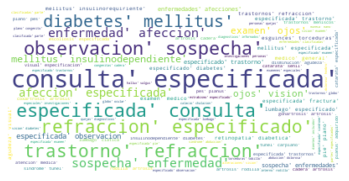

In [49]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(diagnostics_wihout_stopwords))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [50]:
stopwords = nltk.corpus.stopwords.words('spanish')
len(stopwords)

313

In [51]:
stopwords = nltk.corpus.stopwords.words('spanish')
stopwords.extend([
    'consulta',
    'tipo',
    'estudio',
    'afeccion',
    'enf',
    'trastorno',
    'trastornos',
    'incluso',
    'registra',
    'patologia',
    'evaluacion',
    'total',
    'especificada',
    'especificado',
    'enfermedades',
    'enfermedad',
    'fundamento',
    'vicio',
    'derecho',
    'derecha',
    'izquierdo',
    'izquierda',
    'izq',
    'der',
    'pza',
    'bilateral',
    'sospecha',
    'parcial',
    'clinico',
    'ambos',
    'obs',
    'clinico',
    'paciente',
    'aps',
    'especialista',
    'tto',
    'actualizar',
    'trat',
    'derivacion',
    'pcte',
    'pzas',
    'dte',
    'trat'
    'anos',
    'clasificadas',
    'capitulos',
    'tto',
    'especificadas',
    'especificados',
    'requiere',
    'solicita',
    'den',
    'mas',
    'favor',
    'pcte',
    'sup',
    'inf',
    'tto',
    'espcificado',
    'requiero',
    'da',
    'patolog',
    'debido',
    'año',
    'años',
    'cada',
    'ex',
    'obstruccinn',
    'tipos',
    'desconocido',
    'unilateral',
    'grado',
    'parte',
    'debida',
    'debido',
    'remitido',
    'usuaria',
    'usuario',
    'pequeño',
    'pequeña',
    'cm',
    'pz',
    'examen',
    'pasa',
    'infe',
    'sit',
    'pa',
    'ext',
    'grado',
    'hace',
    'in',
    'control',
    'dia',
    'dias',
    'mm',
    'dg',
    'hace',
    'mg',
    'solicito',
    'causa',
    'pre',
    'oa',
    'sitio',
    'tipos',
    'receta',
    'meses',
    'mes',
    'yreceta',
    'presenta',
    'atraves',
    'cada',
    'hace',
    'antec',
    'dia',
    'programa',
    'tratamiento',
    'hace',
    'per',
    'meses',
    'observacion'
])


In [52]:
'observacion' in stopwords

True

In [53]:
len(stopwords)

432

In [54]:
diagnostics

['Esguinces y torceduras de dedo(s) de la mano',
 'Epicondilitis media',
 'Coxartrosis primaria, bilateral',
 'DISCOPATIA',
 'Consulta no Especificada',
 'Lesion del nervio cubital',
 'Examen medico general',
 'Observacion por sospecha de enfermedad o afeccion no especificada',
 'Otras dorsalgias',
 'Sindrome del tunel carpiano',
 'Consulta no Especificada',
 'Desgarro de meniscos, presente',
 'Cervicalgia',
 'Consulta no Especificada',
 'Deformidad en valgo, no clasificada en otra parte',
 'Consulta no Especificada',
 'Observacion por sospecha de enfermedad o afeccion no especificada',
 'Fracturas de otras partes del femur',
 'Otros trastornos de los meniscos',
 'TENDINITIS ROTULIANA',
 'Derrame articular',
 'Esguinces y torceduras de dedo(s) de la mano',
 'Consulta, no especificada',
 'Lumbago con ciatica',
 'Esguinces y torceduras de dedo(s) de la mano',
 'Otros trastornos de la continuidad del hueso',
 'Epicondilitis lateral',
 'Pericoronaritis',
 'Pie plano congenito',
 'NUEVA ROT

In [55]:
diagnostics_wihout_stopwords = []
for diagnostic in diagnostics_tokenized:
    diagnostic_wihout_stopwords = [word for word in diagnostic if word not in stopwords]
    diagnostics_wihout_stopwords.append(diagnostic_wihout_stopwords)

In [56]:
diagnostics_wihout_stopwords

[['esguinces', 'torceduras', 'dedo', 's', 'mano'],
 ['epicondilitis', 'media'],
 ['coxartrosis', 'primaria'],
 ['discopatia'],
 [],
 ['lesion', 'nervio', 'cubital'],
 ['medico', 'general'],
 [],
 ['dorsalgias'],
 ['sindrome', 'tunel', 'carpiano'],
 [],
 ['desgarro', 'meniscos', 'presente'],
 ['cervicalgia'],
 [],
 ['deformidad', 'valgo', 'clasificada'],
 [],
 [],
 ['fracturas', 'partes', 'femur'],
 ['meniscos'],
 ['tendinitis', 'rotuliana'],
 ['derrame', 'articular'],
 ['esguinces', 'torceduras', 'dedo', 's', 'mano'],
 [],
 ['lumbago', 'ciatica'],
 ['esguinces', 'torceduras', 'dedo', 's', 'mano'],
 ['continuidad', 'hueso'],
 ['epicondilitis', 'lateral'],
 ['pericoronaritis'],
 ['pie', 'plano', 'congenito'],
 ['nueva', 'rotura', 'ligamento', 'cruzado', 'anterior'],
 [],
 ['tenosinovitis', 'estiloides', 'radial', 'quervain'],
 ['escoliosis'],
 [],
 [],
 ['traumatismos', 'miembro', 'superior', 'nivel'],
 ['dorsalgia', 'dorsopatias'],
 [],
 [],
 [],
 [],
 [],
 [],
 ['pie', 'plano', 'pes', 

In [59]:
diagnostics_joined = [' '.join(d) for d in diagnostics_wihout_stopwords]
corpus = ' '.join(diagnostics_joined)

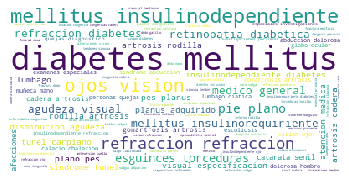

In [60]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(str(corpus))
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()